In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import ceil
from pylab import *
import statsmodels.api as sm

In [2]:
#load Berkeley monthly anomalies (cmip6_srftem_mnly_dlatavg_berkleydata.py)
anomdf = pd.read_csv('/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Data/Berkeley_srftem_anom_latavg_185001-202109.csv',parse_dates=[0])
anomdf.head()

,Unnamed: 0,date,20S20N,20N50N,50N90N,20S50S,50S90S
0,0,1850-01-16,-0.436959,-0.870370,-1.377140,-0.172397,-0.164698
1,1,1850-02-15,-0.340737,-0.345724,0.418300,-0.115273,-0.240848
2,2,1850-03-18,-0.516744,-0.521220,0.209596,-0.025420,0.020281
3,3,1850-04-17,-0.408963,-0.796428,-0.497390,-0.272054,0.158957
4,4,1850-05-17,-0.280826,-0.724566,-0.882785,-0.388906,-0.414594


In [3]:
anomdf.tail()

,Unnamed: 0,date,20S20N,20N50N,50N90N,20S50S,50S90S
2056,2056,2021-05-17,0.612788,1.127293,1.691516,0.615405,0.529189
2057,2057,2021-06-17,0.715895,1.318883,1.682672,0.487840,-0.272590
2058,2058,2021-07-17,0.754085,1.304081,1.189046,0.618895,1.476349
2059,2059,2021-08-17,0.844953,1.099369,1.636852,0.578112,-0.092276
2060,2060,2021-09-16,0.823224,1.408084,2.005259,0.530536,1.575221


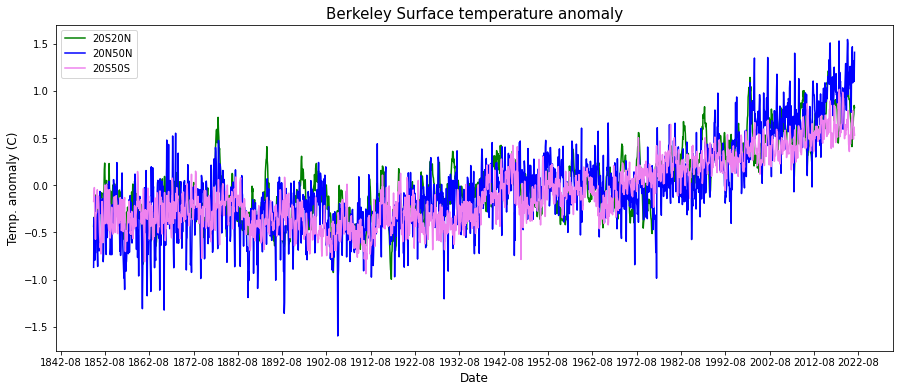

In [4]:
#Plotting (dataframe_matplotlib_pyplot_linesplot.ipynb)
anomdf['date'] = pd.to_datetime(anomdf["date"])

date =anomdf["date"]
a20s20n = anomdf['20S20N']
a20n50n = anomdf['20N50N']
a20s50s = anomdf['20S50S']

fig, ax = plt.subplots(figsize = (15,6))

sel_year_locator = mdates.MonthLocator(interval=120)
year_month_formatter = mdates.DateFormatter("%Y-%m")

ax.xaxis.set_major_locator(sel_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(date,a20s20n,color='green',label='20S20N')
ax.plot(date,a20n50n,color='blue',label='20N50N')
ax.plot(date,a20s50s,color='violet',label='20S50S')
plt.legend(loc='best')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temp. anomaly (C)", fontsize=12)
plt.title("Berkeley Surface temperature anomaly",fontsize=15)
fig.savefig("/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Results/Berkeley1.png",bbox_inches='tight')
plt.show()

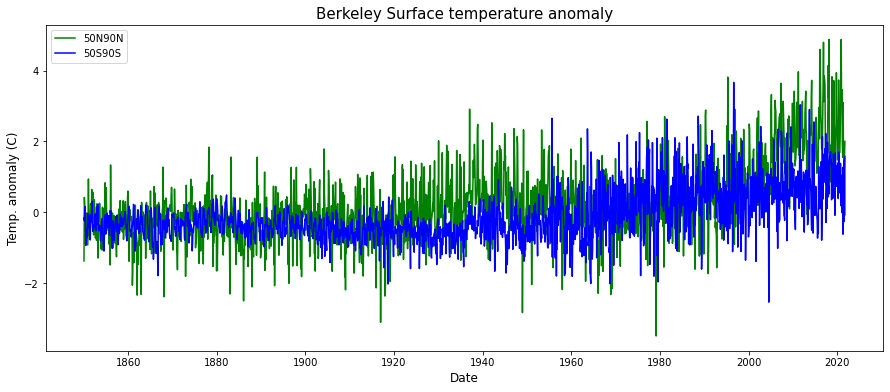

In [5]:
date =anomdf["date"]
a50n90n = anomdf['50N90N']
a50s90s = anomdf['50S90S']


fig, ax = plt.subplots(figsize = (15,6))

ax.plot(date,a50n90n,color='green',label='50N90N')
ax.plot(date,a50s90s,color='blue',label='50S90S')

plt.legend(loc='best')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temp. anomaly (C)", fontsize=12)
plt.title("Berkeley Surface temperature anomaly",fontsize=15)
fig.savefig("/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Results/Berkeley2.png",bbox_inches='tight')
plt.show()

In [6]:
def lowess(x, y, f=2. / 3., iter=3):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest
def pause():
    programPause = input("Press the <ENTER> key to continue...")
    
    
# ***LOESS filter
xx = np.arange(0,len(date))
f = 0.07
smth20s20n = lowess(xx, a20s20n, f=f, iter=5)
smth20n50n = lowess(xx, a20n50n, f=f, iter=5)
smth20s50s = lowess(xx, a20s50s, f=f, iter=5)


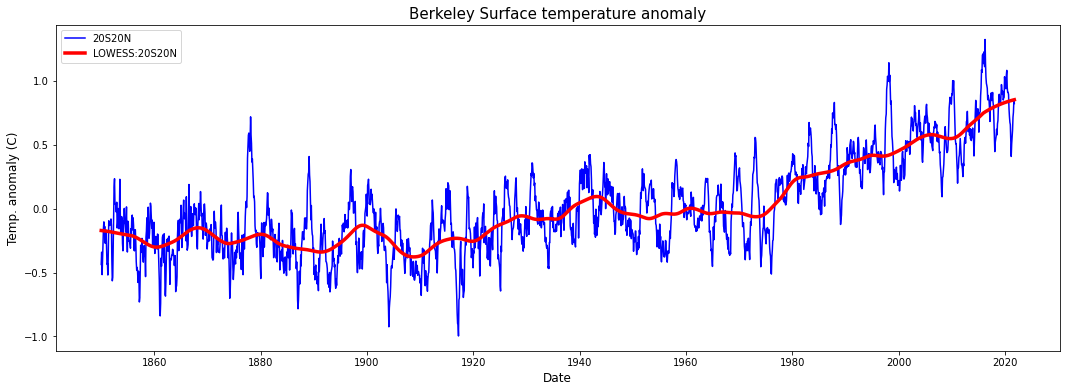

In [7]:
# ***plotting
fig = plt.figure(figsize=(18,6))
# ***row1 cloumn1 plot 
ax1 = fig.add_subplot(111)
# ***CMIP5_RCP6.0
ax1.plot(date,a20s20n,color="blue",lw=1.5,label="20S20N")
ax1.plot(date,smth20s20n,color="red",lw=3.5,label="LOWESS:20S20N")
plt.legend(loc='best')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temp. anomaly (C)", fontsize=12)
plt.title("Berkeley Surface temperature anomaly",fontsize=15)
fig.savefig("/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Results/BerkeleyLowess1.png",bbox_inches='tight')
plt.show()

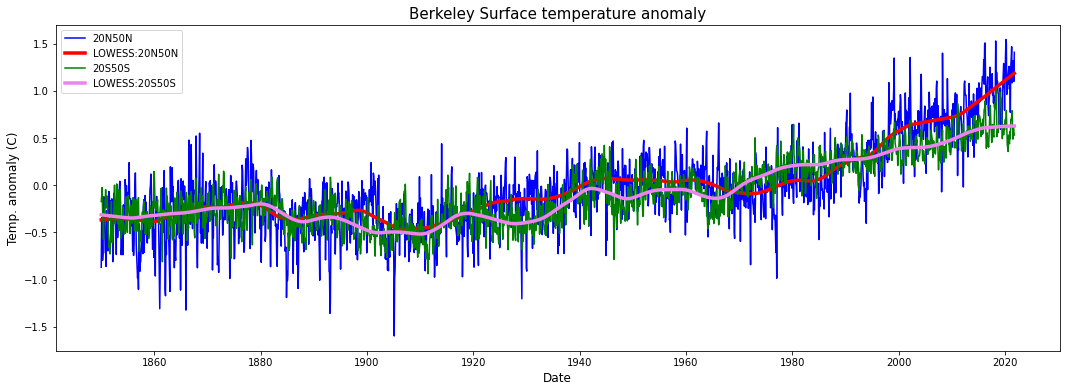

In [8]:
# ***plotting
fig = plt.figure(figsize=(18,6))
# ***row1 cloumn1 plot 
ax1 = fig.add_subplot(111)
# ***CMIP5_RCP6.0
ax1.plot(date,a20n50n,color="blue",lw=1.5,label="20N50N")
ax1.plot(date,smth20n50n,color="red",lw=3.5,label="LOWESS:20N50N")
ax1.plot(date,a20s50s,color="green",lw=1.5,label="20S50S")
ax1.plot(date,smth20s50s,color="violet",lw=3.5,label="LOWESS:20S50S")
plt.legend(loc='best')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temp. anomaly (C)", fontsize=12)
plt.title("Berkeley Surface temperature anomaly",fontsize=15)
fig.savefig("/home/jayanthikishore/Downloads/Preetham_work/Surface_temp/Results/BerkeleyLowess2.png",bbox_inches='tight')
plt.show()